# Data Science Job Market EDA – Personal Project
**Overview:**  
In this project, we analyze thousands of job listings in the data science field to understand skill demand, location trends, and common requirements. We leverage Python, regular expressions, and data visualization techniques to extract meaningful insights.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re

sns.set(style='whitegrid')
%matplotlib inline

**We begin by loading the dataset and checking the structure of the job listing data.**

In [10]:
df = pd.read_csv('alldata.csv', engine='python', on_bad_lines='skip')

**Cleaning the Data: We'll remove listings without job descriptions and reset the index for consistency.**

In [11]:
df = df[df['description'].notnull()].reset_index(drop=True)

## Extracting positions requiring ML/AI/Data Science skills

In [12]:
keywords = ['machine learning', 'ml', 'artificial intelligence', 'ai',
            'data science', 'data scientist', 'deep learning',
            'nlp', 'computer vision', 'neural network', 'statistics',
            'python', 'r', 'sql', 'pandas', 'tensorflow', 'keras']

Filtering Relevant Jobs

In [14]:
import re

# Combining all keywords into one regex pattern (case-insensitive)
pattern = '|'.join([re.escape(word) for word in keywords])

# Filtering rows where description contains any keyword
ml_jobs = df[df['description'].str.contains(pattern, case=False, na=False)]
ml_jobs[['position', 'company', 'location']].head()

,position,company,location
0,Development Director,ALS TDI,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Atlanta, GA"
3,Data Analyst,Operation HOPE,"Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,"Atlanta, GA"


How Many ML/AI-Related Jobs?

In [15]:
print(f"Total ML/AI/Data Science related jobs found: {len(ml_jobs)}")

Total ML/AI/Data Science related jobs found: 253


## Save the filtered DataFrame

In [16]:
ml_jobs.to_csv("filtered_ml_jobs.csv", index=False)

## Visualization 

**1. Most Active Companies in ML/AI Hiring**

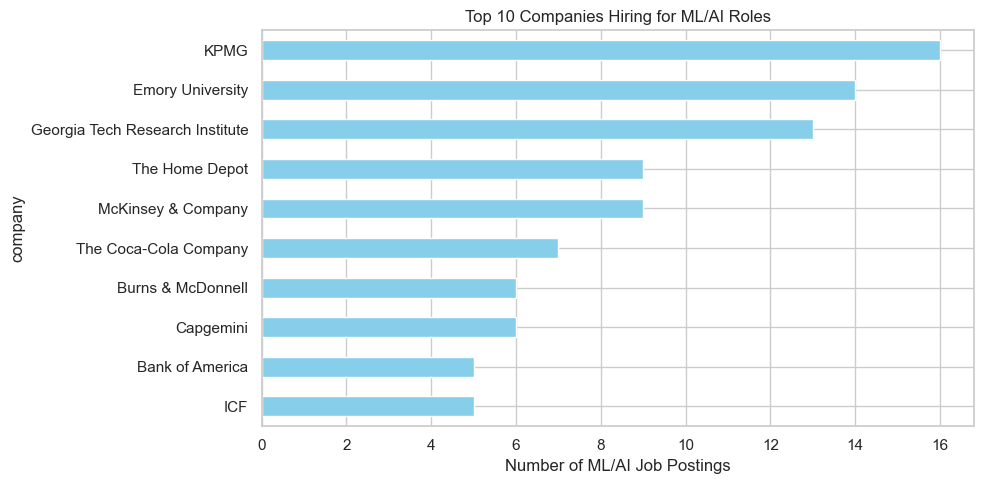

In [18]:
import matplotlib.pyplot as plt

top_companies = ml_jobs['company'].value_counts().head(10)

plt.figure(figsize=(10, 5))
top_companies.plot(kind='barh', color='skyblue')
plt.xlabel("Number of ML/AI Job Postings")
plt.title("Top 10 Companies Hiring for ML/AI Roles")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

**2. ML/AI Job Distribution by Location**

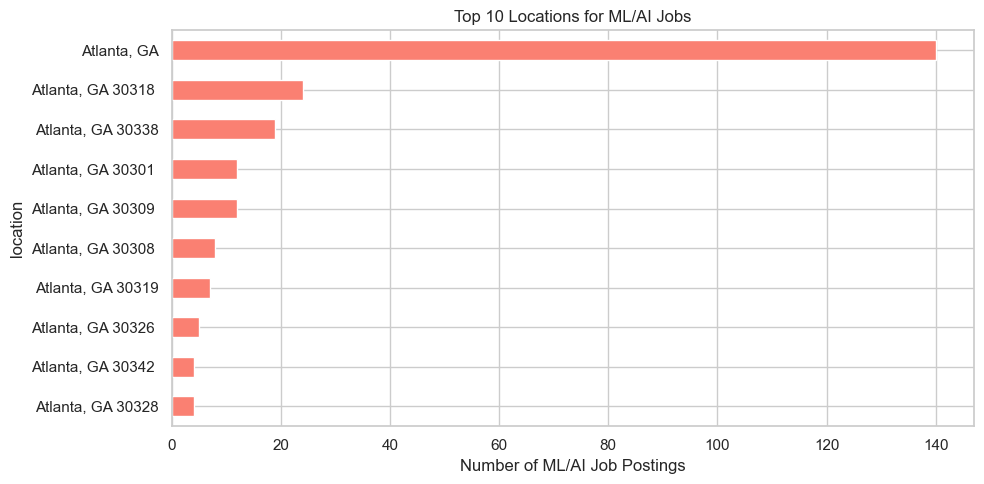

In [20]:
top_locations = ml_jobs['location'].value_counts().head(10)

plt.figure(figsize=(10, 5))
top_locations.plot(kind='barh', color='salmon')
plt.xlabel("Number of ML/AI Job Postings")
plt.title("Top 10 Locations for ML/AI Jobs")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

**3. Word Cloud of Job Descriptions**

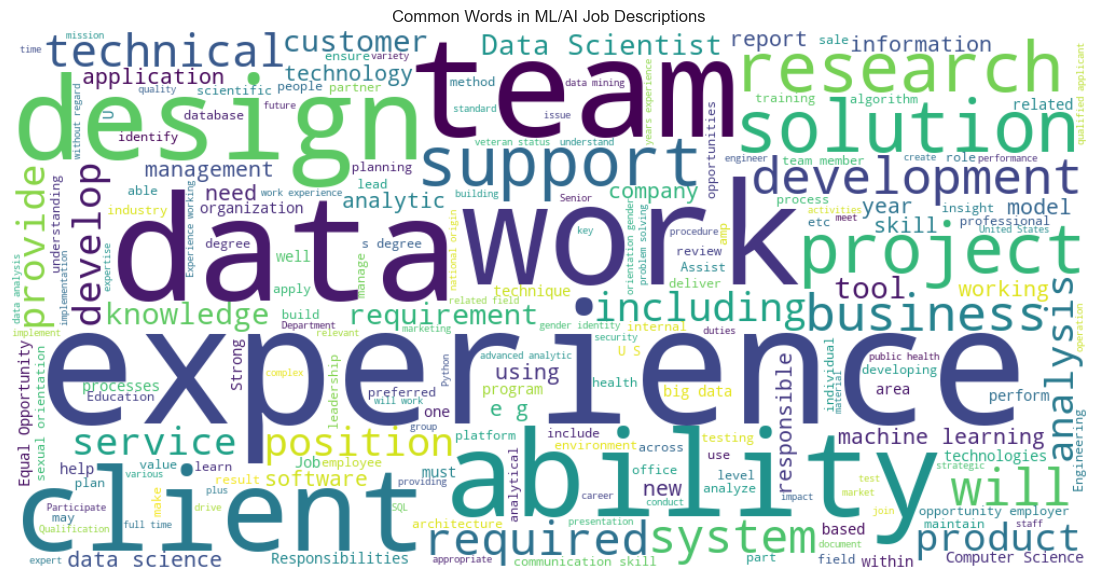

In [21]:
from wordcloud import WordCloud

text = ' '.join(ml_jobs['description'].dropna().tolist())
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Words in ML/AI Job Descriptions')
plt.show()

# Using Regex on Job Descriptions to get a new Column of "Extracted Skills"

In [24]:
import re

# Defining skill patterns
skills_pattern = r'\b(Python|R|SQL|Tableau|Power BI|Excel|Machine Learning|Deep Learning|NLP|Pandas|NumPy|Scikit-learn|AWS|Azure|Spark|TensorFlow|Keras)\b'

# Creating a new column of matched skills
ml_jobs['extracted_skills'] = ml_jobs['description'].str.extractall(skills_pattern).groupby(level=0).agg(', '.join)
ml_jobs[['position', 'company', 'extracted_skills']].head(10)

,position,company,extracted_skills
0,Development Director,ALS TDI,NaN
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"R, R, R"
2,Data Scientist,Xpert Staffing,"R, Python, Machine Learning, R, Python, SQL, T..."
3,Data Analyst,Operation HOPE,"SQL, R, Python, SQL, R, Python, SQL, Tableau"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,NaN
5,Manager of Data Engineering,McKinsey & Company,"SQL, AWS, Azure"
6,"Product Specialist - Periscope, New Ventures",McKinsey & Company,Tableau
7,"Junior to Mid-level Engineer, Geologist or Env...",Wood,NaN
8,Analyst - CIB Credit Research,SunTrust,NaN
9,Senior Associate - Cognitive Data Scientist Na...,KPMG,"NLP, Machine Learning, R, Machine Learning"


## Top 10 Most In-Demand Skills (Pie Chart)

**Step 1: Count Skills from extracted_skills**

In [32]:
from collections import Counter
import matplotlib.pyplot as plt


ml_jobs['extracted_skills'] = ml_jobs['extracted_skills'].fillna('')

# Flattening all skills into a list
all_skills = []
for skills_str in ml_jobs['extracted_skills']:
    skills = [skill.strip() for skill in skills_str.split(',') if skill.strip()]
    all_skills.extend(skills)

# Counting skill frequencies and get top 10
skill_counts = Counter(all_skills)
top_skills = skill_counts.most_common(10)

**Step 2: Plot Pie Chart**

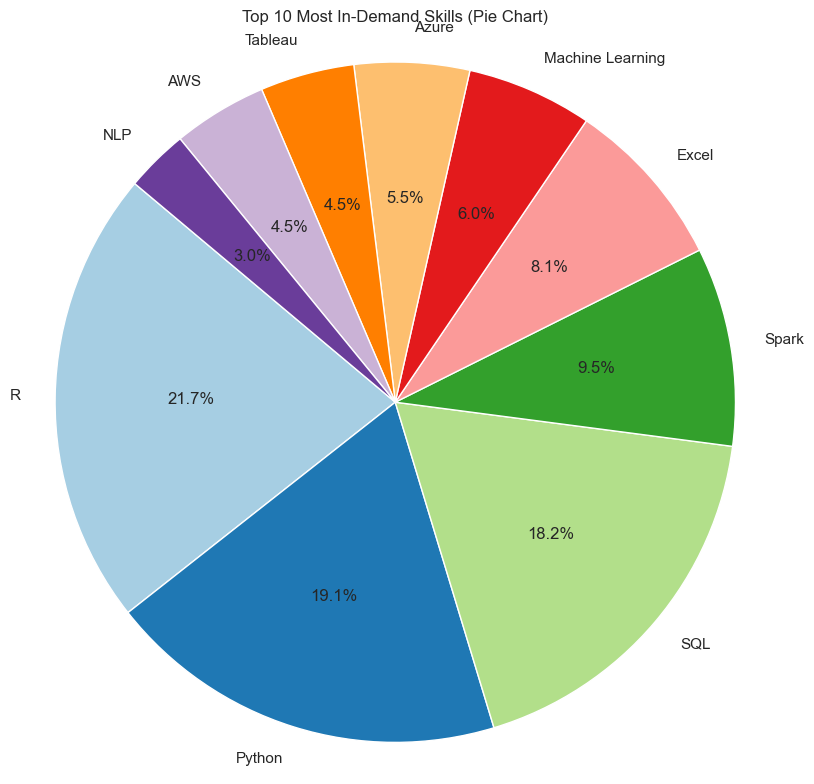

In [33]:
skills, counts = zip(*top_skills)

# Plotting pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    counts,
    labels=skills,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors
)
plt.title("Top 10 Most In-Demand Skills (Pie Chart)")
plt.axis('equal')  # Makes the pie chart circular
plt.tight_layout()
plt.show()

## Merging City-wise Job Data for Deeper Insights

In [39]:
import pandas as pd
ny_df = pd.read_csv("fulltimeNY.csv", on_bad_lines='skip', engine='python')
sf_df = pd.read_csv("fulltimeSF.csv", on_bad_lines='skip', engine='python')

print(ny_df.head())
print(sf_df.head())

                                            position  \
0  Data Scientist—Research (Ref # EXEC/RD_DAT_NYC...   
1                  Data Scientist/Pre Sales Engineer   
2                    Data Analyst/Research Scientist   
3                                     Data Scientist   
4                                     Data Scientist   

                                             company  \
0  New York State Office of the Attorney General ...   
1                                            Celonis   
2                 Columbia University Medical Center   
3                                   fractalanalytics   
4                               Blackboard Insurance   

                                         description    numreview  \
0  <span id="job_summary" class="summary"><p><b>E...          NaN   
1  <span id="job_summary" class="summary"><p>Celo...          NaN   
2  <span id="job_summary" class="summary"><p>We a...  217 reviews   
3  <span id="job_summary" class="summary"><div><p.

**1. Combine the two datasets for a larger city-wide dataset**

In [46]:
combined_df = pd.concat([ny_df, sf_df], ignore_index=True)
print(f"Combined dataset shape: {combined_df.shape}")
print(combined_df.head())

Combined dataset shape: (522, 5)
                                            position  \
0  Data Scientist—Research (Ref # EXEC/RD_DAT_NYC...   
1                  Data Scientist/Pre Sales Engineer   
2                    Data Analyst/Research Scientist   
3                                     Data Scientist   
4                                     Data Scientist   

                                             company  \
0  New York State Office of the Attorney General ...   
1                                            Celonis   
2                 Columbia University Medical Center   
3                                   fractalanalytics   
4                               Blackboard Insurance   

                                         description    numreview  \
0  <span id="job_summary" class="summary"><p><b>E...          NaN   
1  <span id="job_summary" class="summary"><p>Celo...          NaN   
2  <span id="job_summary" class="summary"><p>We a...  217 reviews   
3  <span id="job_

**2. Clean the description column:**
Right now, description has raw HTML tags. We can extract text only using BeautifulSoup or regex to clean it.

In [47]:
from bs4 import BeautifulSoup

def clean_html(raw_html):
    soup = BeautifulSoup(raw_html, 'html.parser')
    return soup.get_text()

combined_df['clean_description'] = combined_df['description'].apply(clean_html)
print(combined_df['clean_description'].head())

0    Executive Division – Research and Analytics De...
1    Celonis is the world's leading process mining ...
2    We are looking for a new person to join our re...
3    As a Data Scientist, you solve complex challen...
4    We’re looking for a rogue Data Scientist who w...
Name: clean_description, dtype: object


**3. Extract or normalize the numreview column**

In [44]:
def extract_review_count(x):
    if pd.isna(x):
        return 0
    else:
        # Remove commas before conversion
        num_str = x.split()[0].replace(',', '')
        return int(num_str)

## Analyses

Step 1: Combine datasets

In [48]:
import pandas as pd

ny_df = pd.read_csv("fulltimeNY.csv", on_bad_lines='skip', engine='python')
sf_df = pd.read_csv("fulltimeSF.csv", on_bad_lines='skip', engine='python')

combined_df = pd.concat([ny_df, sf_df], ignore_index=True)

Step 2: Clean and convert numreview to numeric (using fixed function)

In [50]:
def extract_review_count(x):
    if pd.isna(x):
        return 0
    else:
        num_str = x.split()[0].replace(',', '')
        return int(num_str)

combined_df['numreview_count'] = combined_df['numreview'].apply(extract_review_count)

**Analysis 1: Companies with highest number of reviews**

In [52]:
top_companies = combined_df.groupby('company')['numreview_count'].sum().sort_values(ascending=False).head(10)
print(top_companies)

company
Amazon.com                               129427
JP Morgan Chase                           81276
Bank of America                           43884
Citi                                      28176
KPMG                                      26946
Macy's                                    25765
Capital One                               25277
Sears Holdings Management Corporation     24188
Verizon                                   19883
Accenture                                 14198
Name: numreview_count, dtype: int64


**Analysis 1 - Most common job positions**

In [53]:
top_positions = combined_df['position'].value_counts().head(10)
print(top_positions)

position
Data Scientist                  141
Staff Data Scientist              6
Data Scientist, Analytics         6
Senior Quantitative Analyst       4
Senior Data Engineer              3
Data Engineer                     3
Senior Research Analyst           3
Senior Data Science Engineer      2
Data Scientist I                  2
Lead Data Scientist               2
Name: count, dtype: int64


## Visualization

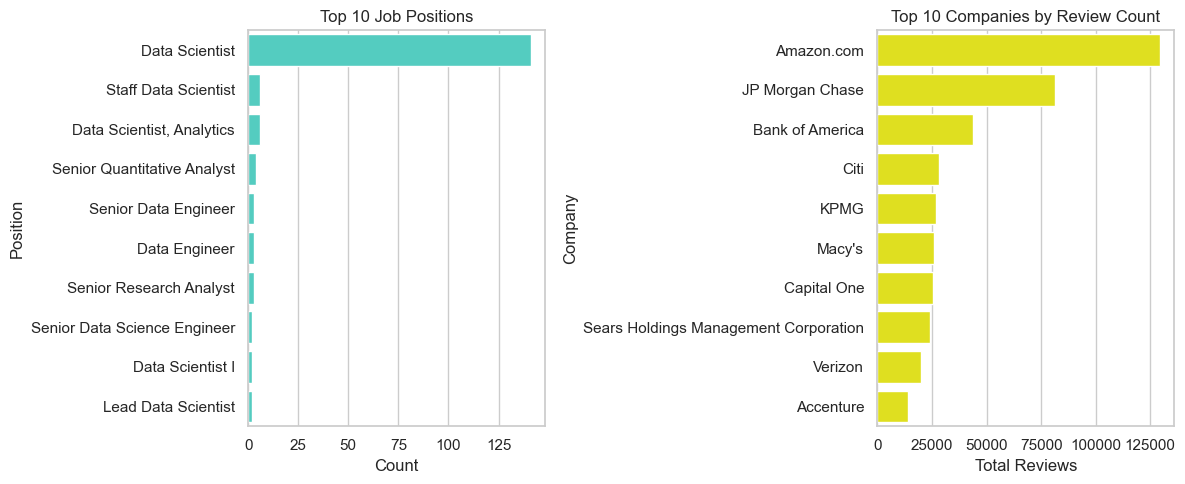

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

# Plot 1: Top job positions
plt.subplot(1, 2, 1)
sns.barplot(x=top_positions.values, y=top_positions.index, color='turquoise')
plt.title('Top 10 Job Positions')
plt.xlabel('Count')
plt.ylabel('Position')

# Plot 2: Top companies by review counts
plt.subplot(1, 2, 2)
sns.barplot(x=top_companies.values, y=top_companies.index, color='yellow')
plt.title('Top 10 Companies by Review Count')
plt.xlabel('Total Reviews')
plt.ylabel('Company')

plt.tight_layout()
plt.show()